# 'Hello distributed world'

The goal of this tutorial is to setup a simulation and run it by using minimal example.

In [1]:
from pymote import *
net_gen = NetworkGenerator(100)
net = net_gen.generate_random_network()
from pymote.algorithms.broadcast import Flood
net.algorithms = ( (Flood, {'informationKey':'I'}), )
some_node = net.nodes()[0]
some_node.memory['I'] = 'Hello distributed world'
sim = Simulation(net)
sim.run()

WARNING [__init__.py]: Environment variable PYMOTE_SETTINGS_MODULE is undefined, using global_settings.
DEBUG   [simulation.py]: Simulation 0x199d40ce380 created successfully.
DEBUG   [simulation.py]: [Flood] Step 1 finished
DEBUG   [simulation.py]: [Flood] Step 2 finished
DEBUG   [simulation.py]: [Flood] Step 3 finished
DEBUG   [simulation.py]: [Flood] Step 4 finished
DEBUG   [simulation.py]: [Flood] Step 5 finished
DEBUG   [simulation.py]: [Flood] Step 6 finished
DEBUG   [simulation.py]: [Flood] Step 7 finished
DEBUG   [simulation.py]: [Flood] Step 8 finished
DEBUG   [simulation.py]: [Flood] Step 9 finished
DEBUG   [simulation.py]: [Flood] Step 10 finished
DEBUG   [simulation.py]: [Flood] Step 11 finished
DEBUG   [simulation.py]: [Flood] Step 12 finished
DEBUG   [simulation.py]: [Flood] Step 13 finished
DEBUG   [simulation.py]: [Flood] Step 14 finished
DEBUG   [simulation.py]: [Flood] Step 15 finished
DEBUG   [simulation.py]: [Flood] Step 16 finished
DEBUG   [simulation.py]: [Flood] 

That's it! For more elaborate description please continue reading.

In the example given above, the goal was to simulate distributed algorithm `Flood` on arbitrary network. Algorithm `Flood` solves *Broadcast* problem, i.e. the goal of the algorithm is to share information that is present in one or more nodes to all other nodes in the network.

In this example the IPython interactive console is started with `ipymote` or `ipython --profile=pymote`. This way certain names from Pymote package should already be available such as `Node` or `Network`.

### Generating network

Networks are fundamental objects in the Pymote and they can be created by instantiating `Network` class or by using  `NetworkGenerator` class. `NetworkGenerator` can receive different parameters such as number of nodes (exact, min, max), average number of neighbors per node etc.

In this example the only parametar that we want to have in control is number of nodes. which is set to 100.

In [ ]:
net_gen = NetworkGenerator(100)

Now generator's methods can be used to generate new networks with specified parameters, i.e. for generating network with random placement of nodes there is method `generate_random_network()`:

In [ ]:
net = net_gen.generate_random_network()

*Note:* One of the `NetworkGenerator` parameters control if the generated network should be connected (which means  there are no isolated segments of the network). This parameter `connected` is by default set to `True` so if the number of nodes is set too low then some generator's methods  might not be able to produce the network.

The result is instance of the Network class:

In [ ]:
net

which can be visualized with its `show()` method:

c:\Users\agust\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
c:\Users\agust\AppData\Local\Programs\Python\Python311\Lib\site-packages\pymote\network.py:207: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


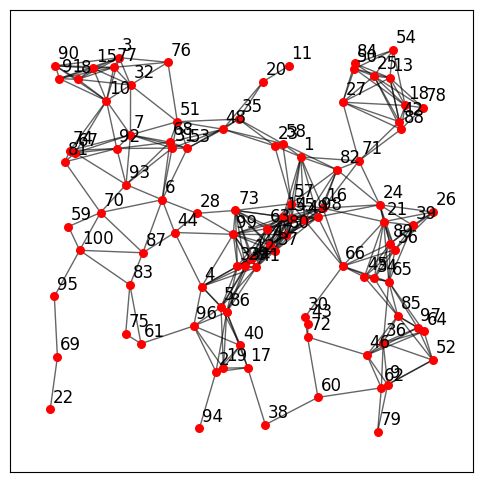

In [2]:
net.show()

### Algorithm

Algorithm `Flood` is part of the `broadcast` module so it should be imported:

In [ ]:
from pymote.algorithms.broadcast import Flood

and then assigned to the generated network:

In [ ]:
net.algorithms = ( (Flood, {'informationKey':'I'}), )

Two things should be noted:

* there can be multiple algorithms that are being assigned to the network so specific algorithms are elements of `tuple`. Since in this example there is only one algorithm we must append `,` so that Python knows it's a one element `tuple` i.e. `(1)` is `int`, but `(1,)` is `tuple`.
* every algorithm element is `tuple` itself, consisting of two elements. Former is an algorithm class, in this example `Flood`. Later is a `dict` of keyword parameters, i.e. `Flood` must be given 'informationKey' as a required parameter: that is the name of the key under which the nodes should store broadcasted information in their memory.


This algorithm demands that at least one node knows information to be broadcasted, so in this example at least one node should have some value stored under `I` key:

In [ ]:
some_node = net.nodes()[0]                         # take the first node, it can be any node
some_node.memory['I'] = 'Hello distributed world'  # under key 'I' write the information to be boradcasted

 This way `some_node` has become algorithm initiator.

### Simulation

After network creation and setup all that is left to do is to create and run simulation. Every simulation has its own network (sent as parameter) that it runs on:

In [ ]:
sim = Simulation(net)

DEBUG    [simulation.py]: Simulation 0x6a12788 created successfully.


Finally, run simulation:

In [ ]:
sim.run()

DEBUG    [simulation.py]: [Flood] Step 1 finished


DEBUG    [simulation.py]: [Flood] Step 2 finished


DEBUG    [simulation.py]: [Flood] Step 3 finished


DEBUG    [simulation.py]: [Flood] Step 4 finished


DEBUG    [simulation.py]: [Flood] Step 5 finished


DEBUG    [simulation.py]: [Flood] Step 6 finished


DEBUG    [simulation.py]: [Flood] Step 7 finished


DEBUG    [simulation.py]: [Flood] Step 8 finished


DEBUG    [simulation.py]: [Flood] Step 9 finished


DEBUG    [simulation.py]: [Flood] Step 10 finished


DEBUG    [simulation.py]: [Flood] Step 11 finished


DEBUG    [simulation.py]: [Flood] Step 12 finished


DEBUG    [simulation.py]: [Flood] Step 13 finished


DEBUG    [simulation.py]: [Flood] Step 14 finished


DEBUG    [simulation.py]: [Flood] Step 15 finished


DEBUG    [simulation.py]: [Flood] Step 16 finished


DEBUG    [simulation.py]: [Flood] Step 17 finished


DEBUG    [simulation.py]: [Flood] Step 18 finished


DEBUG    [simulation.py]: [Flood] Step 19 finished


DEBUG    [simulation.py]: [Flood] Step 20 finished


DEBUG    [simulation.py]: [Flood] Step 21 finished


DEBUG    [simulation.py]: [Flood] Step 22 finished


DEBUG    [simulation.py]: [Flood] Step 23 finished


DEBUG    [simulation.py]: [Flood] Step 24 finished


DEBUG    [simulation.py]: [Flood] Step 25 finished


DEBUG    [simulation.py]: [Flood] Step 26 finished


DEBUG    [simulation.py]: [Flood] Step 27 finished


DEBUG    [simulation.py]: [Flood] Step 28 finished


DEBUG    [simulation.py]: [Flood] Algorithm finished


INFO     [simulation.py]: Simulation has finished. There are no algorithms left to run. To run it from the start use sim.reset().


After the algorithm(s) execution is done we can check if the resullt is as expected, that is every node should have information in their memory:

In [3]:
for node in net.nodes():
    print(node.memory['I']),

Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distributed world
Hello distribute

During simulation execution, network and its nodes are changing their status, memory content etc. To memorize the currently running algorithm and current step of the simulation, network has a special attribute `algorithmsState`:

In [4]:
net.algorithmState

{'index': 0, 'step': 23, 'finished': True}

If simulation is going to be run again, it must be reset:

In [6]:
sim.reset()

INFO    [simulation.py]: Resetting simulation.


whereby:

* `algorithmState` is returned to the initial value:

In [7]:
net.algorithmState

{'index': 0, 'step': 1, 'finished': False}

* memory content of all node's is deleted (as long as some other attributes)

In [8]:
for node in net.nodes():
    print(node.memory)

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}


In [9]:
some_node.memory['I'] = 'Hello again'
sim.run()

DEBUG   [simulation.py]: [Flood] Step 1 finished
DEBUG   [simulation.py]: [Flood] Step 2 finished
DEBUG   [simulation.py]: [Flood] Step 3 finished
DEBUG   [simulation.py]: [Flood] Step 4 finished
DEBUG   [simulation.py]: [Flood] Step 5 finished
DEBUG   [simulation.py]: [Flood] Step 6 finished
DEBUG   [simulation.py]: [Flood] Step 7 finished
DEBUG   [simulation.py]: [Flood] Step 8 finished
DEBUG   [simulation.py]: [Flood] Step 9 finished
DEBUG   [simulation.py]: [Flood] Step 10 finished
DEBUG   [simulation.py]: [Flood] Step 11 finished
DEBUG   [simulation.py]: [Flood] Step 12 finished
DEBUG   [simulation.py]: [Flood] Step 13 finished
DEBUG   [simulation.py]: [Flood] Step 14 finished
DEBUG   [simulation.py]: [Flood] Step 15 finished
DEBUG   [simulation.py]: [Flood] Step 16 finished
DEBUG   [simulation.py]: [Flood] Step 17 finished
DEBUG   [simulation.py]: [Flood] Step 18 finished
DEBUG   [simulation.py]: [Flood] Step 19 finished
DEBUG   [simulation.py]: [Flood] Step 20 finished
DEBUG   [